<a href="https://colab.research.google.com/github/ahzaidy/Programs/blob/main/CPSC_5410_HW2_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

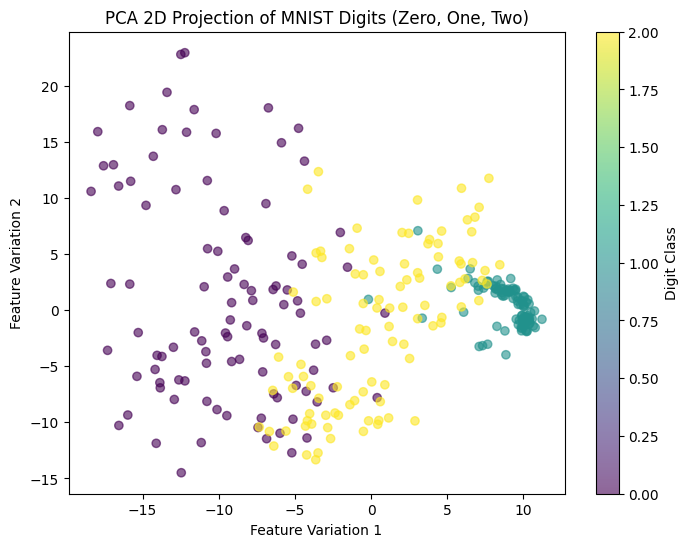

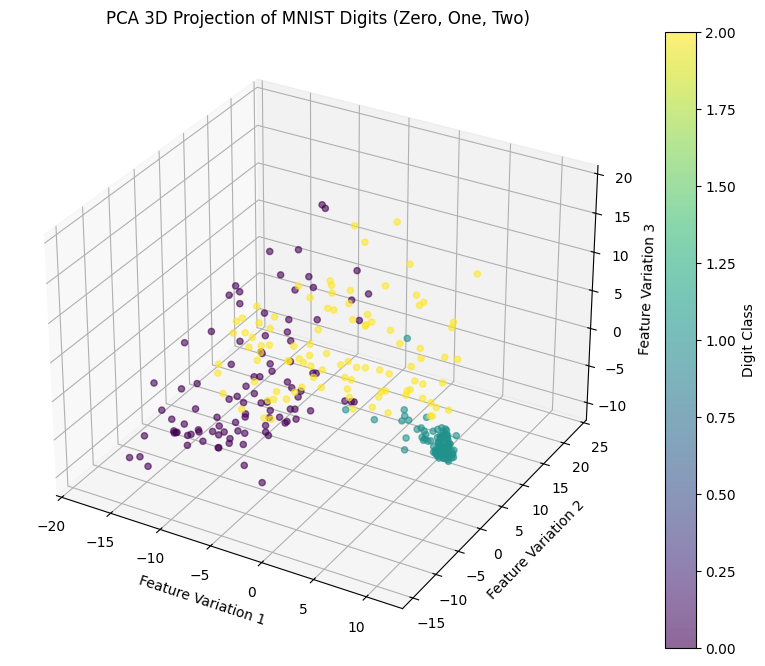

In [2]:
###############################################################################
#Author: Arif H. Zaidy                                                        #
#Date: March 10, 2025                                                         #
#Course: CPSC 5410                                                            #
#Topic: Assignment 2, Question 1                                              #
#Description:                                                                 #
#This script performs PCA on a dataset of MNIST digits (0, 1, 2). It loads the#
#dataset, standardizes the features, and applies PCA. The data is then        #
#visualized in both 2D and 3D using scatter plots. The script uses matplotlib #
#for visualization and scikit-learn for PCA. The dataset is fetched from the  #
#file MNIST_digits0-1-2.csv and processed dynamically to generate PCA-based   #
#visual representations of the digits.                                        #
###############################################################################


# Including Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# URL path to the dataset
file_path = "https://raw.githubusercontent.com/ahzaidy/Programs/refs/heads/main/MNIST_digits0-1-2.csv"

def load_data():
    # Load the dataset from the given file path
    data = pd.read_csv(file_path)

    # Extract labels (last column) and features (all other columns)
    labels = data.iloc[:, -1]  # Assuming labels are in the last column
    features = data.iloc[:, :-1]  # Assuming features are all but the last column

    return labels, features

def preprocess_data(features):
    # Standardize the features to have zero mean and unit variance
    scaler = StandardScaler()
    return scaler.fit_transform(features)

def apply_pca(features_scaled, n_components):
    # Apply Principal Component Analysis (PCA) to reduce dimensions
    pca = PCA(n_components=n_components)
    return pca.fit_transform(features_scaled)

def plot_2d(features_2d, labels):
    # Define a colormap for visual differentiation of labels
    colormap = plt.cm.viridis  # Alternative colormaps: 'plasma', 'inferno'

    # Create a 2D scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap=colormap, alpha=0.6)

    # Set axis labels and title
    plt.xlabel("Feature Variation 1")
    plt.ylabel("Feature Variation 2")
    plt.title("PCA 2D Projection of MNIST Digits (Zero, One, Two)")

    # Add a color bar to indicate label mapping
    plt.colorbar(scatter, label='Digit Class')

    # Show the plot
    plt.show()

def plot_3d(features_3d, labels):
    # Define a colormap for visual differentiation of labels
    colormap = plt.cm.viridis  # Alternative colormaps: 'plasma', 'inferno'

    # Create a figure and 3D axis for visualization
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Use a 3D scatter plot to display PCA-transformed features
    scatter = ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], c=labels, cmap=colormap, alpha=0.6)

    # Set axis labels and title
    ax.set_xlabel("Feature Variation 1")
    ax.set_ylabel("Feature Variation 2")
    ax.set_zlabel("Feature Variation 3")
    ax.set_title("PCA 3D Projection of MNIST Digits (Zero, One, Two)")

    # Add a color bar to indicate label mapping
    plt.colorbar(scatter, ax=ax, label='Digit Class')

    # Show the plot
    plt.show()

def main():

    # Load and preprocess data
    labels, features = load_data()
    features_scaled = preprocess_data(features)

    # Apply PCA for 2D and 3D visualizations
    features_2d = apply_pca(features_scaled, 2)
    features_3d = apply_pca(features_scaled, 3)

    # Plot results
    plot_2d(features_2d, labels)
    plot_3d(features_3d, labels)

# Run the script if executed directly
if __name__ == "__main__":
    main()